## 统计分布
## 标准化数据 ln

In [707]:
import numpy as np
import pandas as pd
import pandas_profiling
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import tsfresh
import xgboost as xgb

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import r2_score,f1_score,mean_squared_error,accuracy_score,mean_absolute_error,mean_squared_error,explained_variance_score,mean_absolute_error
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,LogisticRegression
from sklearn.model_selection import GridSearchCV


%matplotlib inline

In [38]:
os.getcwd()
os.chdir('/Users/shenjiyuan/Desktop/大学课程内容/机器学习基础/时序数据回归预测')

In [4]:
df=pd.read_csv("Data/data.csv",sep=',')

In [5]:
df

,pre,2W,4W,6W,8W,10W,12W,label
0,77.830,NaN,0.026,NaN,NaN,NaN,0.003,0
1,5.370,0.123,NaN,0.168,NaN,NaN,0.296,0
2,23.290,0.192,NaN,0.027,NaN,NaN,0.060,0
3,20.000,NaN,NaN,0.060,NaN,NaN,0.035,0
4,4.660,0.122,0.010,NaN,0.01,NaN,0.010,0
...,...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,NaN,NaN,0.000,1
223,21.000,0.640,0.060,0.110,NaN,NaN,NaN,1
224,15.300,NaN,0.050,0.001,NaN,NaN,0.003,1
225,23.000,0.750,0.110,0.030,NaN,NaN,NaN,1


In [37]:
profile = df.profile_report(title='Data')
profile.to_file(output_file="Data/Data.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
df.isnull().sum()
pd.value_counts(df['2W'])

pre        1
2W        22
4W        51
6W        61
8W       188
10W      169
12W      194
label      0
dtype: int64

In [340]:
imputer = KNNImputer(n_neighbors=16)
imputed = imputer.fit_transform(df)
df_KNN = pd.DataFrame(imputed, columns=df.columns)
df_KNN=df_KNN.round(3)

In [342]:
df_KNN.to_csv('Data/Data_KNN_imputed.csv')

In [348]:
df_rfc=df_rfc.round(5)
df_rfc.to_csv("Data/Data_RFC_imputed.csv")

In [635]:
df_KNN=pd.read_csv("Data/Data_KNN_imputed.csv")

In [483]:
X_rfc_T.to_csv("Data/Data_RFC_imputed_T.csv",index=1)

In [71]:
df_rfc.to_csv("Data/Data_RFC_imputed_new.csv")

In [135]:
X_knn=pd.read_csv("Data/Data_KNN_imputed.csv")

In [7]:
X_rfc=X_rfc.drop("Unnamed: 0",axis=1)

In [9]:
y=df['label']

In [639]:
X_KNN=df_KNN.drop("label",axis=1)

In [671]:
df_rfc

,pre,2W,4W,6W,8W,10W,12W,label
0,77.830,0.009,0.026,0.000,0.002,0.001,0.003,0
1,5.370,0.123,0.000,0.168,0.085,0.001,0.296,0
2,23.290,0.192,0.000,0.027,0.002,0.001,0.060,0
3,20.000,0.009,0.000,0.060,0.002,0.001,0.035,0
4,4.660,0.122,0.010,0.000,0.010,0.000,0.010,0
...,...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,0.001,0.001,0.000,1
223,21.000,0.640,0.060,0.110,0.013,0.001,0.012,1
224,15.300,0.008,0.050,0.001,0.001,0.001,0.003,1
225,23.000,0.750,0.110,0.030,0.001,0.008,0.011,1


## 提取特征

In [474]:
extraced_features = tsfresh.extract_features(X_rfc_1,column_id='id')
extraced_features.head()


Feature Extraction: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


,4W__variance_larger_than_standard_deviation,4W__has_duplicate_max,4W__has_duplicate_min,4W__has_duplicate,4W__sum_values,4W__abs_energy,4W__mean_abs_change,4W__mean_change,4W__mean_second_derivative_central,4W__median,...,2W__permutation_entropy__dimension_5__tau_1,2W__permutation_entropy__dimension_6__tau_1,2W__permutation_entropy__dimension_7__tau_1,2W__query_similarity_count__query_None__threshold_0.0,"2W__matrix_profile__feature_""min""__threshold_0.98","2W__matrix_profile__feature_""max""__threshold_0.98","2W__matrix_profile__feature_""mean""__threshold_0.98","2W__matrix_profile__feature_""median""__threshold_0.98","2W__matrix_profile__feature_""25""__threshold_0.98","2W__matrix_profile__feature_""75""__threshold_0.98"
0,0.0,0.0,0.0,0.0,0.026,0.000676,NaN,NaN,NaN,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.000,0.000000,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.000,0.000000,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.000,0.000000,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.010,0.000100,NaN,NaN,NaN,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [476]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extraced_features)
filtered_features = select_features(extraced_features, y)
filtered_features.head()


/opt/anaconda3/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['4W__mean_abs_change' '4W__mean_change'
 '4W__mean_second_derivative_central' ...
 '2W__matrix_profile__feature_"median"__threshold_0.98'
 '2W__matrix_profile__feature_"25"__threshold_0.98'
 '2W__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


,12W__sum_values,12W__abs_energy,12W__median,12W__mean,12W__root_mean_square,12W__maximum,12W__quantile__q_0.1,12W__quantile__q_0.2,12W__quantile__q_0.3,12W__quantile__q_0.4,...,2W__sum_values,"2W__fft_coefficient__attr_""abs""__coeff_0","2W__fft_coefficient__attr_""real""__coeff_0",6W__range_count__max_1__min_-1,8W__benford_correlation,8W__value_count__value_0,8W__count_below__t_0,10W__benford_correlation,6W__value_count__value_0,6W__count_below__t_0
0,0.003,0.000009,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,...,0.009,0.009,0.009,1.0,0.295657,0.0,0.0,0.864123,1.0,1.0
1,0.296,0.087616,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,...,0.123,0.123,0.123,1.0,-0.272809,0.0,0.0,0.864123,0.0,0.0
2,0.060,0.003600,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,...,0.192,0.192,0.192,1.0,0.295657,0.0,0.0,0.864123,0.0,0.0
3,0.035,0.001225,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,...,0.009,0.009,0.009,1.0,0.295657,0.0,0.0,0.864123,0.0,0.0
4,0.010,0.000100,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,...,0.122,0.122,0.122,1.0,0.864123,0.0,0.0,0.864123,1.0,1.0


In [478]:
filtered_features.to_csv("Data/filtered_features.csv",index=1)

In [54]:
(df-df.mean())/df.std()

,pre,2W,4W,6W,8W,10W,12W,label
0,0.684884,NaN,-0.112173,NaN,NaN,NaN,-0.412782,-1.066059
1,-0.425096,-0.421072,NaN,-0.274868,NaN,NaN,0.362056,-1.066059
2,-0.150588,-0.399006,NaN,-0.323182,NaN,NaN,-0.262046,-1.066059
3,-0.200986,NaN,NaN,-0.311874,NaN,NaN,-0.328158,-1.066059
4,-0.435972,-0.421392,-0.112886,NaN,-0.25372,NaN,-0.394271,-1.066059
...,...,...,...,...,...,...,...,...
222,-0.382357,-0.337607,-0.111995,-0.330378,NaN,NaN,-0.420715,0.933903
223,-0.185667,-0.255741,-0.110658,-0.294742,NaN,NaN,NaN,0.933903
224,-0.272983,NaN,-0.111103,-0.332091,NaN,NaN,-0.412782,0.933903
225,-0.155030,-0.220564,-0.108429,-0.322154,NaN,NaN,NaN,0.933903


In [10]:
df_rfc=df_rfc.drop("Unnamed: 0",axis=1)

In [35]:
y=df['label']

In [740]:
X_rfc=df_rfc.iloc[:,:7]

In [741]:
X_rfc.shape
y.shape

(227,)

In [742]:
X_rfc

,pre,2W,4W,6W,8W,10W,12W
0,77.830,0.009,0.026,0.000,0.002,0.001,0.003
1,5.370,0.123,0.000,0.168,0.085,0.001,0.296
2,23.290,0.192,0.000,0.027,0.002,0.001,0.060
3,20.000,0.009,0.000,0.060,0.002,0.001,0.035
4,4.660,0.122,0.010,0.000,0.010,0.000,0.010
...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,0.001,0.001,0.000
223,21.000,0.640,0.060,0.110,0.013,0.001,0.012
224,15.300,0.008,0.050,0.001,0.001,0.001,0.003
225,23.000,0.750,0.110,0.030,0.001,0.008,0.011


In [745]:
yy

0      0.003
1      0.296
2      0.060
3      0.035
4      0.010
       ...  
222    0.000
223    0.012
224    0.003
225    0.011
226    0.004
Name: 12W, Length: 227, dtype: float64

## 投票回归

In [743]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
yy=X_rfc['12W']
X, yy = X_rfc.iloc[:,1:6],yy

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg4 = SVR(kernel='rbf',C=1.0,gamma=1.0)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3),('svr', reg4)])
ereg = ereg.fit(X, yy)
reg1.fit(X, yy)
reg2.fit(X, yy)
reg3.fit(X, yy)
reg4.fit(X, yy)

SVR(gamma=1.0)

In [746]:
X_rfc.iloc[0:5,1:7]

,2W,4W,6W,8W,10W,12W
0,0.009,0.026,0.000,0.002,0.001,0.003
1,0.123,0.000,0.168,0.085,0.001,0.296
2,0.192,0.000,0.027,0.002,0.001,0.060
3,0.009,0.000,0.060,0.002,0.001,0.035
4,0.122,0.010,0.000,0.010,0.000,0.010


In [747]:
xt = X_rfc.iloc[:,1:6]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = reg4.predict(xt)
pred5 = ereg.predict(xt)

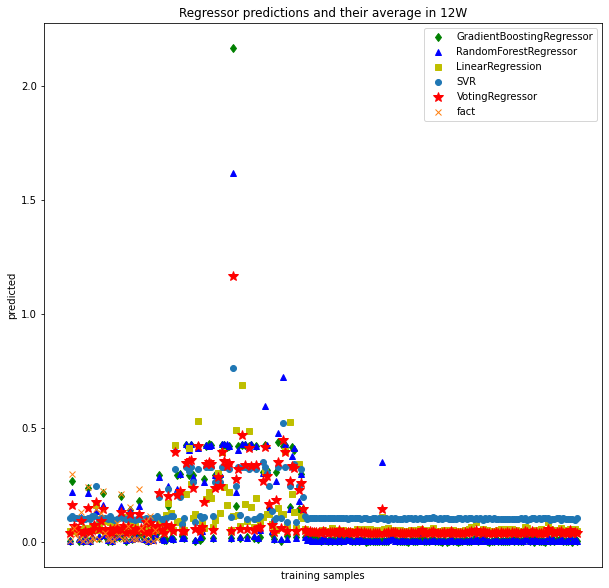

In [748]:
plt.figure(figsize=(10,10))
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'o',  label='SVR')
plt.plot(pred5, 'r*', ms=10, label='VotingRegressor')
plt.plot(yy[0:40], 'x', label="fact")

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average in 12W')
plt.xticks(np.arange(0, 40, 5))
# plt.savefig("Regressor predictions and their average in 14W.png")
plt.show()

In [749]:
print(f"rmse:{mean_squared_error(yy, pred5,squared=False)},"
              f"解释方差:{explained_variance_score(yy, pred5)},"
              f"MAPE:{mean_absolute_error(yy, pred5)},"
                f"{r2_score(yy,pred5)}")

rmse:0.08427294662327826,解释方差:0.8236774375795133,MAPE:0.04800657378272824,0.8188201571429763


In [750]:
X_rfc

,pre,2W,4W,6W,8W,10W,12W
0,77.830,0.009,0.026,0.000,0.002,0.001,0.003
1,5.370,0.123,0.000,0.168,0.085,0.001,0.296
2,23.290,0.192,0.000,0.027,0.002,0.001,0.060
3,20.000,0.009,0.000,0.060,0.002,0.001,0.035
4,4.660,0.122,0.010,0.000,0.010,0.000,0.010
...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,0.001,0.001,0.000
223,21.000,0.640,0.060,0.110,0.013,0.001,0.012
224,15.300,0.008,0.050,0.001,0.001,0.001,0.003
225,23.000,0.750,0.110,0.030,0.001,0.008,0.011


In [752]:
X_rfc_reg=X_rfc.copy()
s=12
for i in range(4):
    reg = ereg.predict(X_rfc_reg.iloc[:,-5:])
    s=s+2
    title=str(s)+'W'
    print(title)
    X_rfc_reg[title]=reg

14W
16W
18W
20W


In [753]:
X_rfc_reg

,pre,2W,4W,6W,8W,10W,12W,14W,16W,18W,20W
0,77.830,0.009,0.026,0.000,0.002,0.001,0.003,0.038315,0.039712,0.046622,0.062144
1,5.370,0.123,0.000,0.168,0.085,0.001,0.296,0.055172,0.059137,0.050835,0.071357
2,23.290,0.192,0.000,0.027,0.002,0.001,0.060,0.038790,0.051047,0.058088,0.067429
3,20.000,0.009,0.000,0.060,0.002,0.001,0.035,0.038151,0.047238,0.056121,0.065697
4,4.660,0.122,0.010,0.000,0.010,0.000,0.010,0.038607,0.039831,0.074056,0.057352
...,...,...,...,...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,0.001,0.001,0.000,0.036707,0.038229,0.045781,0.075540
223,21.000,0.640,0.060,0.110,0.013,0.001,0.012,0.039422,0.041014,0.050455,0.056619
224,15.300,0.008,0.050,0.001,0.001,0.001,0.003,0.037029,0.039687,0.046347,0.058319
225,23.000,0.750,0.110,0.030,0.001,0.008,0.011,0.103100,0.049894,0.051394,0.067085


## KNN归因  k=16
https://deephub.blog.csdn.net/article/details/109270839

## randomforest归因 
https://www.pythonheidong.com/blog/article/170243/fd9d71a76c41b3fcfb33/

In [79]:
def optimize_k(data, target):
    rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))
    errors = []
    plt.figure()
    for k in range(1, 40, 1):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        plt.plot(k,error)
    
    plt.show()
    return errors

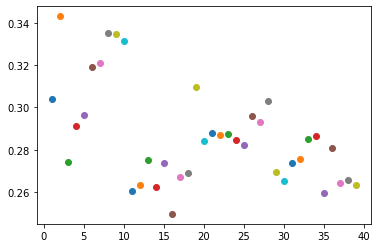

[{'K': 1, 'RMSE': 0.304227460670609},
 {'K': 2, 'RMSE': 0.3430268084339005},
 {'K': 3, 'RMSE': 0.2744282594144003},
 {'K': 4, 'RMSE': 0.2913088902955373},
 {'K': 5, 'RMSE': 0.29651600147451534},
 {'K': 6, 'RMSE': 0.31914968547553113},
 {'K': 7, 'RMSE': 0.32089887341111334},
 {'K': 8, 'RMSE': 0.33491725129857275},
 {'K': 9, 'RMSE': 0.33442682958731956},
 {'K': 10, 'RMSE': 0.33147234129483305},
 {'K': 11, 'RMSE': 0.2604302460227657},
 {'K': 12, 'RMSE': 0.26351305553004883},
 {'K': 13, 'RMSE': 0.27512052694742006},
 {'K': 14, 'RMSE': 0.26248395396091645},
 {'K': 15, 'RMSE': 0.2736746719865697},
 {'K': 16, 'RMSE': 0.24980862240140342},
 {'K': 17, 'RMSE': 0.2671630344125507},
 {'K': 18, 'RMSE': 0.2693107143608758},
 {'K': 19, 'RMSE': 0.30968778106204065},
 {'K': 20, 'RMSE': 0.2842916444963425},
 {'K': 21, 'RMSE': 0.28775366880900666},
 {'K': 22, 'RMSE': 0.2868039778997677},
 {'K': 23, 'RMSE': 0.28751559504017227},
 {'K': 24, 'RMSE': 0.2844865703256521},
 {'K': 25, 'RMSE': 0.2823580828602605

In [80]:
k_errors = optimize_k(data=df, target='label')
k_errors

In [309]:
X_df=df.drop('label',axis=1)
y_df=df['label']
X_missing = X_df.copy()  #用回归填补缺失值的特征矩阵
sortindex = np.argsort(X_missing.isnull().sum(axis=0)).values   # axis=0 按列进行加和
sortindex
#找出数据集中，缺失值从小到大排列的特征值的顺序
# argsort和sort的区别是，前者排完之后还有索引

array([0, 1, 2, 3, 5, 4, 6])

In [332]:
def RandomForestImputed(X_missing_reg, sortindex,y_full):
    column=X_missing_reg.columns.tolist()
    X = X_missing_reg.copy()
    for i in sortindex:
        # 构建我们的新特征矩阵（没有被选中去填充的特征们+原始的标签）和新标签（被选中去填充的特征）
        df = X_missing_reg
        # 新标签
        fillc = df.iloc[:,i]  # 所有的行
        # 新特征矩阵
        df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)  # 所有的行
        # 在新特征矩阵中，对含有缺失值的列，进行0的填补
        df_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
        # 找出我们的训练集和测试集
        Ytrain = fillc[fillc.notnull()]  # 被选中要填充的特征中（现在是我们的标签），存在的哪些值，非空值
        Ytest = fillc[fillc.isnull()]   # 是被选中的要填充的特种中（现在是我们的标签），不存在的那些值，空值
        # 我们需要的不是Ytest的值，而是Ytest所带的索引
        Xtrain = df_0[Ytrain.index,:]   # 在新特征矩阵上，被选出来的要填充的特征的非空值所对应的记录
        Xtest = df_0[Ytest.index,:]    # 新特征矩阵上，被选出来的要填充的特征所对应的空值所对应的记录
        # 用随机森林的回归来填补缺失值
        rfc = RandomForestRegressor(n_estimators = 100)#实例化
        rfc = rfc.fit(Xtrain,Ytrain)  # 导入训练集去进行训练
        Ypredict = rfc.predict(Xtest) # 用predict接口将Xtest导入，得到我们的预测结果（回归结果），这个预测结果就是我们要用来填补空值的值
        # 将填补好的特征返回到我们的原始特征矩阵中
#         print(X.loc[X.iloc[:,i].isnull(),column[i]],Ypredict)
        X.loc[X.iloc[:,i].isnull(),column[i]] = Ypredict
    return X

In [343]:
df_rfc = RandomForestImputed(X_missing, sortindex,y_df)

In [162]:
X_0=df.fillna(0).drop('label',axis=1)
X_02=df.fillna(0.2).drop('label',axis=1)
X_KNN=X_knn.iloc[:,1:8]
X_rfc

,pre,2W,4W,6W,8W,10W,12W
0,77.830,0.009,0.026,0.000,0.002,0.001,0.003
1,5.370,0.123,0.000,0.168,0.085,0.001,0.296
2,23.290,0.192,0.000,0.027,0.002,0.001,0.060
3,20.000,0.009,0.000,0.060,0.002,0.001,0.035
4,4.660,0.122,0.010,0.000,0.010,0.000,0.010
...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,0.001,0.001,0.000
223,21.000,0.640,0.060,0.110,0.013,0.001,0.012
224,15.300,0.008,0.050,0.001,0.001,0.001,0.003
225,23.000,0.750,0.110,0.030,0.001,0.008,0.011


In [212]:
X_df=df.dropna()

In [213]:
X_df

,pre,2W,4W,6W,8W,10W,12W,label


In [217]:
X = [X_0, X_02, X_KNN, X_rfc]

acc = []

for i in range(len(X)):
    estimator = LogisticRegression() # 实例化
    scores = cross_val_score(estimator,X[i],y,cv=5).mean()
    acc.append(scores) 
print(acc)

[0.7992270531400967, 0.7947826086956522, 0.7856038647342996, 0.7903381642512077]


In [199]:
# model=SVC()
# model=LinearRegression()
model=RandomForestClassifier()
scores = cross_val_score(model, X_0, y, cv=5)
print(f"scores:{scores}\naverage scores:{scores.mean()}")

scores:[0.86956522 0.91304348 0.93333333 0.97777778 0.95555556]
average scores:0.9298550724637682


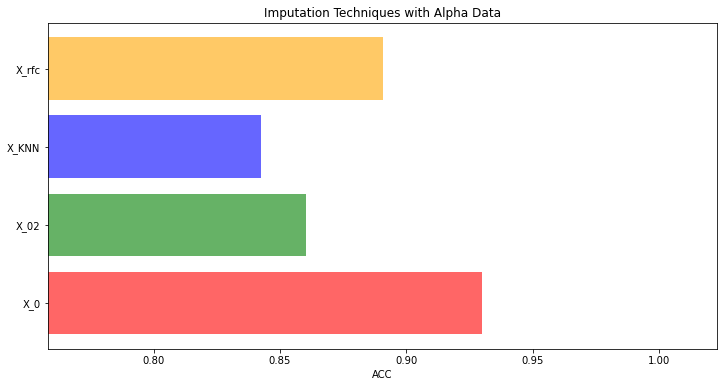

In [206]:
x_lables = ['X_0', 'X_02', 'X_KNN', 'X_rfc']
colors = ["r", "g", "b", "orange"]
plt.figure(figsize=(12,6))  # 画出画布
ax = plt.subplot(111) # 添加子图 plt.subplot
for i in np.arange(len(acc)):
    ax.barh(i,acc[i],color=colors[i],alpha=0.6,align='center') # 画条形图,alpah是条的粗度，align是条放在哪里
ax.set_title('Imputation Techniques with Alpha Data')
ax.set_xlim(left=np.min(acc)*0.9
           ,right=np.max(acc)*1.1)  # 最右边是mse取到1,1倍，最左边是mse取到0.9倍，我们不需要从0开始的刻度
ax.set_yticks(np.arange(len(acc)))
ax.set_xlabel('ACC')  # x轴的名字
# ax.invert_yaxis()  # 把y上面这个轴命名好，然并卵
ax.set_yticklabels(x_lables) # 用x_lables里面的这些东西作y的命名
# plt.show()
plt.savefig("Imputation Techniques with Alpha Data.png")

In [64]:
df_rfc

,Unnamed: 0,pre,2W,4W,6W,8W,10W,12W
0,0,77.830,0.009,0.026,0.000,0.002,0.001,0.003
1,1,5.370,0.123,0.000,0.168,0.085,0.001,0.296
2,2,23.290,0.192,0.000,0.027,0.002,0.001,0.060
3,3,20.000,0.009,0.000,0.060,0.002,0.001,0.035
4,4,4.660,0.122,0.010,0.000,0.010,0.000,0.010
...,...,...,...,...,...,...,...,...
222,222,8.160,0.384,0.030,0.006,0.001,0.001,0.000
223,223,21.000,0.640,0.060,0.110,0.013,0.001,0.012
224,224,15.300,0.008,0.050,0.001,0.001,0.001,0.003
225,225,23.000,0.750,0.110,0.030,0.001,0.008,0.011


## 滑动窗口

In [501]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    将时间序列重构为监督学习数据集.
    参数:
        data: 观测值序列，类型为列表或Numpy数组。
        n_in: 输入的滞后观测值(X)长度。
        n_out: 输出观测值(y)的长度。
        dropnan: 是否丢弃含有NaN值的行，类型为布尔值。
    返回值:
        经过重组后的Pandas DataFrame序列.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # 输入序列 (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # 预测序列 (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # 将列名和数据拼接在一起
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # 丢弃含有NaN值的行
    if dropnan:
        agg.dropna(inplace=True)
    return agg

data = series_to_supervised(X_rfc, 2, 2)
pd.DataFrame(data)

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var1(t-1),var2(t-1),...,var7(t),var8(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1),var8(t+1)
2,77.830,0.009,0.026,0.000,0.002,0.001,0.003,0.0,5.370,0.123,...,0.060,0.0,20.000,0.009,0.000,0.060,0.002,0.001,0.035,0.0
3,5.370,0.123,0.000,0.168,0.085,0.001,0.296,0.0,23.290,0.192,...,0.035,0.0,4.660,0.122,0.010,0.000,0.010,0.000,0.010,0.0
4,23.290,0.192,0.000,0.027,0.002,0.001,0.060,0.0,20.000,0.009,...,0.010,0.0,14.280,0.628,0.000,0.000,0.004,0.001,0.130,0.0
5,20.000,0.009,0.000,0.060,0.002,0.001,0.035,0.0,4.660,0.122,...,0.130,0.0,5.400,0.160,0.003,0.000,0.001,0.038,0.004,0.0
6,4.660,0.122,0.010,0.000,0.010,0.000,0.010,0.0,14.280,0.628,...,0.004,0.0,13.016,0.361,0.088,0.053,0.001,0.072,0.013,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,18.542,1.151,0.140,0.032,0.001,0.010,0.011,1.0,7.110,0.185,...,0.003,1.0,8.160,0.384,0.030,0.006,0.001,0.001,0.000,1.0
222,7.110,0.185,0.014,0.002,0.001,0.001,0.002,1.0,10.515,0.581,...,0.000,1.0,21.000,0.640,0.060,0.110,0.013,0.001,0.012,1.0
223,10.515,0.581,0.072,0.008,0.001,0.001,0.003,1.0,8.160,0.384,...,0.012,1.0,15.300,0.008,0.050,0.001,0.001,0.001,0.003,1.0
224,8.160,0.384,0.030,0.006,0.001,0.001,0.000,1.0,21.000,0.640,...,0.003,1.0,23.000,0.750,0.110,0.030,0.001,0.008,0.011,1.0


In [656]:
X_rfc.iloc

### svr_p:rbf,C:10,gamma:10
### svr_n:rbf,C:0.001,gamma:0.001

In [73]:
X_rfc

,pre,2W,4W,6W,8W,10W,12W
0,77.830,0.009,0.026,0.000,0.002,0.001,0.003
1,5.370,0.123,0.000,0.168,0.085,0.001,0.296
2,23.290,0.192,0.000,0.027,0.002,0.001,0.060
3,20.000,0.009,0.000,0.060,0.002,0.001,0.035
4,4.660,0.122,0.010,0.000,0.010,0.000,0.010
...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,0.001,0.001,0.000
223,21.000,0.640,0.060,0.110,0.013,0.001,0.012
224,15.300,0.008,0.050,0.001,0.001,0.001,0.003
225,23.000,0.750,0.110,0.030,0.001,0.008,0.011


In [74]:
select_model_para(SVR(),X_rfc,1,1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

***:{'C': 1.0, 'gamma': 1.0}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [709]:
def select_model_para(model_,X,n_in, n_out):
    col=X.columns.tolist()
    model = GridSearchCV(model_, param_grid={
                                             "C": np.logspace(-5, 0, 4), 
                                             "gamma": np.logspace(-5, 0, 4)
                                            })
    for i in range(len(col)):
        if i+n_in+n_out>len(col):
            break
        t=col[i:i+n_in]
        l=col[i+n_in:i+n_in+n_out]
        X_train, X_test, y_train, y_test = train_test_split(X[t], X[l], test_size=0.2, random_state=42)
        model.fit(X_train,y_train)
    print(f"***:{model.best_params_}")

def fit(model,X,n_in, n_out,name):
    col=X.columns.tolist()
    for i in range(len(col)):
        if i+n_in+n_out>len(col):
            break
        t=col[i:i+n_in]
        l=col[i+n_in:i+n_in+n_out]
        X_train, X_test, y_train, y_test = train_test_split(X[t], X[l], test_size=0.2, random_state=42)
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
#         print(model.score(X_test, y_test))
        print(f"第{i}次,"
              f"rmse:{mean_squared_error(y_test, pred,squared=False)},"
              f"解释方差:{explained_variance_score(y_test, pred)},"
              f"MAPE:{mean_absolute_error(y_test, pred)}"
             f"{r2_score(y_test,pred)}")
#         print(pred.shape)
        b=y_test.values.flatten()
#         print(y_test.values.flatten())
        print(f"corr:{np.corrcoef(pred,b)}")
        plt.plot(pred,'gd',label='pred')
        plt.plot(b,'o',label='fact')
#         plt.scatter(X_train, y_train, c='k', label='data', zorder=1)
#         plt.scatter(X_test,pred, c='r', label='SVR_fit')
#         plt.scatter(X_test,y_test, c='b', label='true')
#         plt.xlabel('data')
#         plt.ylabel('target')
#         plt.title(f'{model} {name} {i+1}')
        plt.legend()
        plt.show()
            
    


def model_reg(data, model_p, model_n , n_in=4, n_out=1):
    X_rfc_p=data[data['label']==0]
    X_rfc_n=data[data['label']==1]
    X_rfc_p=X_rfc_p.drop('label',axis=1)
    X_rfc_n=X_rfc_n.drop('label',axis=1)
#     select_model_para(model_n,X_rfc_n,n_in, n_out)
#     select_model_para(model_n,X_rfc_n,n_in, n_out)
    fit(model_p,X_rfc_p,n_in, n_out,'positive')
    fit(model_n,X_rfc_n,n_in, n_out,'negtive')
        

[18:18:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
第0次,rmse:0.8400799272109979,解释方差:0.011977035278802894,MAPE:0.43875931745225727-0.0009743484827817728
corr:[[1.         0.17850051]
 [0.17850051 1.        ]]


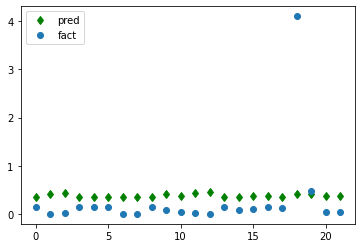

[18:18:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
第1次,rmse:0.7068716660493358,解释方差:0.059381080129891184,MAPE:0.42742921866070140.05747087648369964
corr:[[1.         0.52485904]
 [0.52485904 1.        ]]


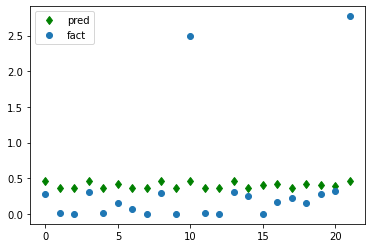

[18:18:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
第2次,rmse:0.2644839354725958,解释方差:0.31054519927795254,MAPE:0.21801868356357923-1.151178387295618
corr:[[1.         0.80051469]
 [0.80051469 1.        ]]


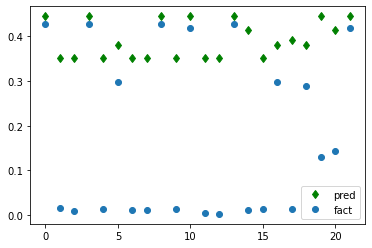

[18:18:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
第0次,rmse:0.2436983531513072,解释方差:-1.5543122344752192e-15,MAPE:0.24368300910949706-7940.389512283273
corr:[[nan nan]
 [nan  1.]]


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


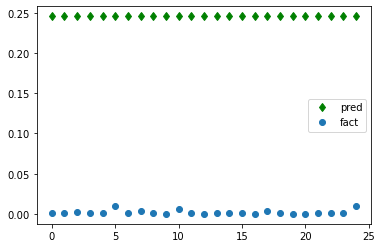

[18:18:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


第1次,rmse:0.24526575160808786,解释方差:-1.7763568394002505e-15,MAPE:0.24524377935409547-5580.510624988889
corr:[[nan nan]
 [nan  1.]]


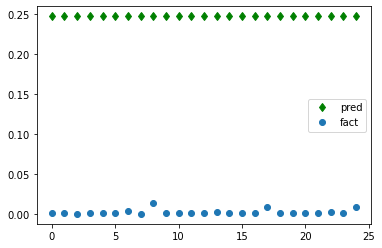

[18:18:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
第2次,rmse:0.24374814068694584,解释方差:-1.7763568394002505e-15,MAPE:0.24374733985900882-152184.33834104287
corr:[[nan nan]
 [nan  1.]]


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


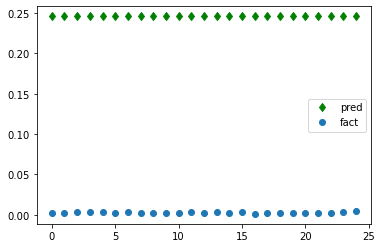

In [723]:
model_xgb_p = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model_xgb_n = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model_reg(df_rfc,model_xgb_p,model_xgb_n)

<ipython-input-709-2447b2a80245>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


第0次,rmse:0.7423859179056035,解释方差:0.23007003333408482,MAPE:0.224690454545454550.218298072112878
corr:[[1.         0.72468287]
 [0.72468287 1.        ]]


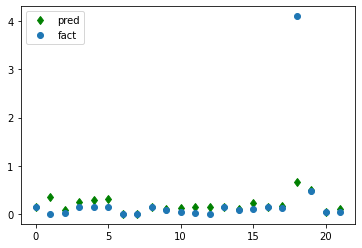

<ipython-input-709-2447b2a80245>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


第1次,rmse:0.3267789376697115,解释方差:0.8024036432078827,MAPE:0.157360454545454440.7985711172818822
corr:[[1.         0.91439855]
 [0.91439855 1.        ]]


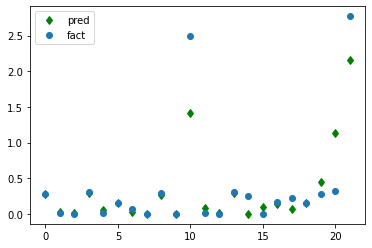

<ipython-input-709-2447b2a80245>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


第2次,rmse:0.08565125478038567,解释方差:0.800808807768289,MAPE:0.051036363636363630.7743967829265177
corr:[[1.         0.89539197]
 [0.89539197 1.        ]]


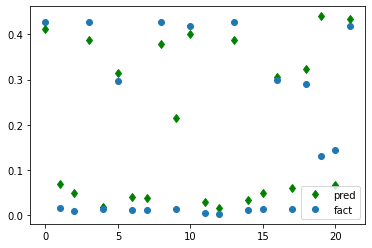

<ipython-input-709-2447b2a80245>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


第0次,rmse:0.003330660595137247,解释方差:-0.23909893025245976,MAPE:0.0023444000000000004-0.48337879760376534
corr:[[1.         0.44392812]
 [0.44392812 1.        ]]


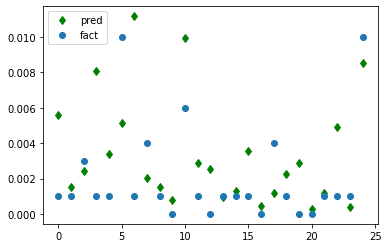

<ipython-input-709-2447b2a80245>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


第1次,rmse:0.0053820594571223354,解释方差:-1.6805751781472655,MAPE:0.0028284-1.6876636728028473
corr:[[ 1.         -0.10532361]
 [-0.10532361  1.        ]]


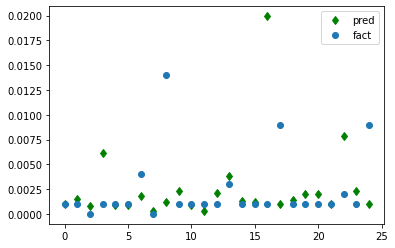

<ipython-input-709-2447b2a80245>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


第2次,rmse:0.0004659613717895506,解释方差:0.46124426229508186,MAPE:0.00027760000000000040.44385245901639403
corr:[[1.        0.6858568]
 [0.6858568 1.       ]]


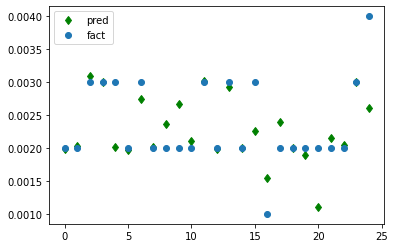

In [719]:
model_p = RandomForestRegressor()
model_n = RandomForestRegressor()
model_reg(df_rfc,model_p,model_n)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第0次,rmse:0.7803449163018983,解释方差:0.1654974729294677,MAPE:0.201347384191621460.13631586260109618
corr:[[1.         0.62692511]
 [0.62692511 1.        ]]


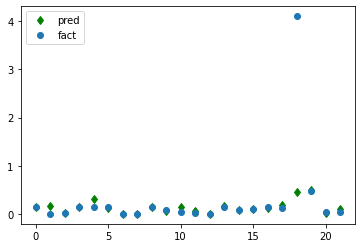

第1次,rmse:0.29263247727186176,解释方差:0.8393942532054826,MAPE:0.125374198583020870.838467959833108
corr:[[1.         0.91742389]
 [0.91742389 1.        ]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


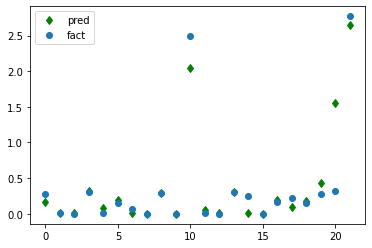

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第2次,rmse:0.08657331158551183,解释方差:0.7768469935185573,MAPE:0.051326242115017110.7695132895130444
corr:[[1.         0.88138952]
 [0.88138952 1.        ]]


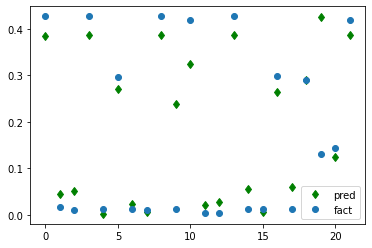

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第0次,rmse:0.003927228940850634,解释方差:-0.7270333048936402,MAPE:0.0024204788657212093-1.062356540684477
corr:[[1.         0.42691302]
 [0.42691302 1.        ]]


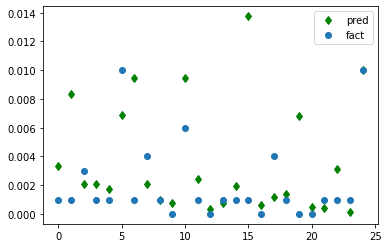

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第1次,rmse:0.003489330063332128,解释方差:-0.059564701580009594,MAPE:0.0019470018463478914-0.12969717663240332
corr:[[1.        0.1371323]
 [0.1371323 1.       ]]


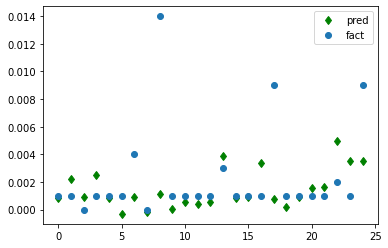

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第2次,rmse:0.00046196163715319917,解释方差:0.47154080218958383,MAPE:0.000306114586304261230.453359236164795
corr:[[1.         0.69047194]
 [0.69047194 1.        ]]


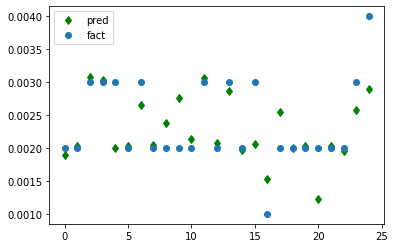

In [715]:
model_p = GradientBoostingRegressor()
model_n = GradientBoostingRegressor()
model_reg(df_rfc,model_p,model_n)

In [646]:
model_p =LinearRegression()
model_n = LinearRegression()
model_reg(df_rfc,model_p,model_n)

第0次,rmse:0.8445224969840969,解释方差:-0.008847628127518048,MAPE:0.4088864655371564


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 22

In [672]:
data=df_rfc
X_rfc_p=data[data['label']==0]
X_rfc_n=data[data['label']==1]
X_rfc_p=X_rfc_p.drop('label',axis=1)
X_rfc_n=X_rfc_n.drop('label',axis=1)

In [673]:
X_rfc_p.iloc[:,3:]

,6W,8W,10W,12W
0,0.000,0.002,0.001,0.003
1,0.168,0.085,0.001,0.296
2,0.027,0.002,0.001,0.060
3,0.060,0.002,0.001,0.035
4,0.000,0.010,0.000,0.010
...,...,...,...,...
101,0.457,0.141,0.011,0.013
102,11.780,0.105,0.130,0.144
103,1.438,0.148,0.191,0.296
104,0.432,0.158,0.140,0.144


In [728]:
a_p=model_xgb_p.predict(X_rfc_p.iloc[:20,3:])
a_n=model_xgb_n.predict(X_rfc_p.iloc[:20,3:])

ValueError: feature_names mismatch: ['4W', '6W', '8W', '10W'] ['6W', '8W', '10W', '12W']
expected 4W in input data
training data did not have the following fields: 12W

In [721]:
aa=(a_p*0.95+a_n*0.05)

In [704]:
y_test=X_rfc_p.iloc[:20,-1]

In [705]:
y_test

0     0.003
1     0.296
2     0.060
3     0.035
4     0.010
5     0.130
6     0.004
7     0.013
8     0.240
9     0.003
10    0.016
11    0.013
12    0.144
13    0.013
14    0.126
15    0.222
16    0.037
17    0.009
18    0.012
19    0.003
Name: 12W, dtype: float64

In [725]:
print(f"第end次,"
      f"rmse:{mean_squared_error(aa, y_test,squared=False)},"
      f"解释方差:{explained_variance_score(aa, y_test)},"
      f"MAPE:{mean_absolute_error(aa, y_test)}",
     f"{r2_score(aa,y_test)}")

第end次,rmse:0.12946600340499623,解释方差:-1.6466907716559005,MAPE:0.09280837499999997 -1.6515967218069312


第0次,rmse:0.8375474975499397,解释方差:0.014797124077311818,MAPE:0.42886934819914340.005051450518518075
corr:[[1.         0.16375308]
 [0.16375308 1.        ]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


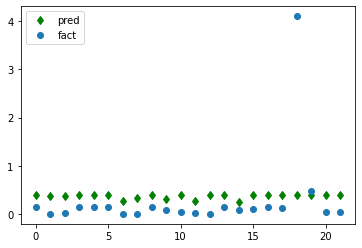

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第1次,rmse:0.5427477681250188,解释方差:0.4473393186682775,MAPE:0.295523726090986650.44433924702105854
corr:[[1.         0.82560968]
 [0.82560968 1.        ]]


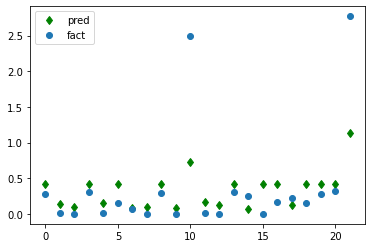

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第2次,rmse:0.12671382469223025,解释方差:0.5063620446054997,MAPE:0.110540279014030280.5062287170352011
corr:[[1.         0.74495801]
 [0.74495801 1.        ]]


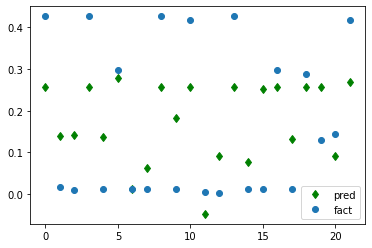

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第0次,rmse:0.023122283624244382,解释方差:2.220446049250313e-16,MAPE:0.02296-70.49122807017542
corr:[[1.00000000e+00 2.02990582e-16]
 [2.02990582e-16 1.00000000e+00]]


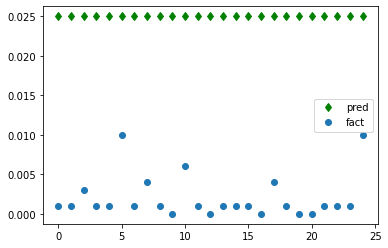

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第1次,rmse:0.04579781654183964,解释方差:3.3306690738754696e-16,MAPE:0.045680000000000005-193.61104513064132
corr:[[ 1.00000000e+00 -1.05681561e-17]
 [-1.05681561e-17  1.00000000e+00]]


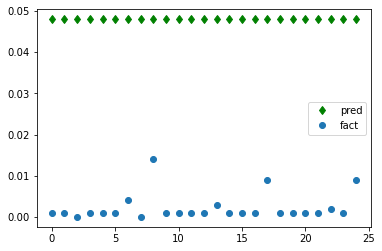

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


第2次,rmse:0.004186884283091663,解释方差:1.1102230246251565e-16,MAPE:0.00414-43.9026639344262
corr:[[nan nan]
 [nan  1.]]


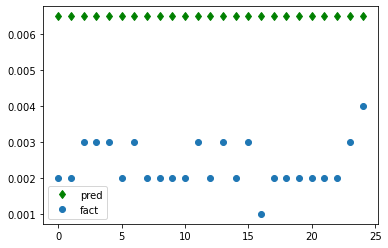

In [714]:
model_p = SVR(kernel='rbf',C=10,gamma=10)
model_n = SVR(kernel='rbf',C=0.001,gamma=0.001)
model_reg(df_rfc,model_p,model_n)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第0次,rmse:0.8375474975499397,解释方差:0.014797124077311818,MAPE:0.42886934819914340.005051450518518075
corr:[[1.         0.16375308]
 [0.16375308 1.        ]]


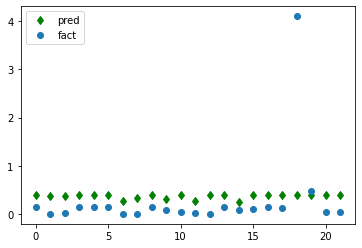

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第1次,rmse:0.5427477681250188,解释方差:0.4473393186682775,MAPE:0.295523726090986650.44433924702105854
corr:[[1.         0.82560968]
 [0.82560968 1.        ]]


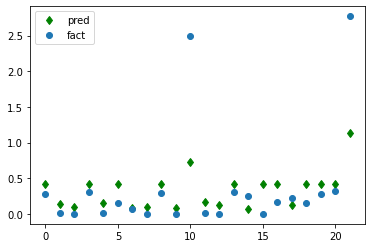

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第2次,rmse:0.12671382469223025,解释方差:0.5063620446054997,MAPE:0.110540279014030280.5062287170352011
corr:[[1.         0.74495801]
 [0.74495801 1.        ]]


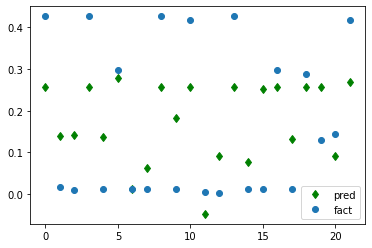

第0次,rmse:0.023122283624244382,解释方差:2.220446049250313e-16,MAPE:0.02296-70.49122807017542
corr:[[1.00000000e+00 2.02990582e-16]
 [2.02990582e-16 1.00000000e+00]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


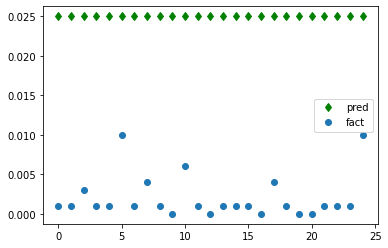

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


第1次,rmse:0.04579781654183964,解释方差:3.3306690738754696e-16,MAPE:0.045680000000000005-193.61104513064132
corr:[[ 1.00000000e+00 -1.05681561e-17]
 [-1.05681561e-17  1.00000000e+00]]


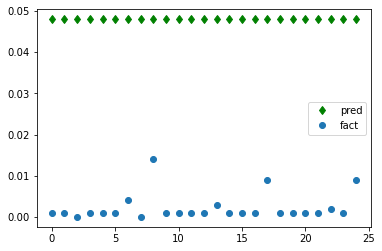

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


第2次,rmse:0.004186884283091663,解释方差:1.1102230246251565e-16,MAPE:0.00414-43.9026639344262
corr:[[nan nan]
 [nan  1.]]


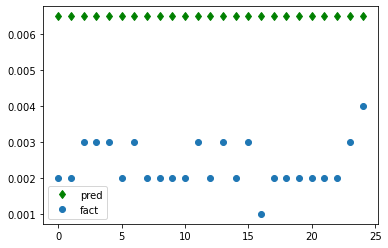

In [880]:
model_p = SVR(kernel='rbf',C=10,gamma=10)
model_n = SVR(kernel='rbf',C=0.001,gamma=0.001)
# model_p=DecisionTreeRegressor()
# model_n=DecisionTreeRegressor()
# model_p = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
# model_n = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
model_reg(df_rfc,model_p,model_n)

In [793]:
X_rfc.iloc[0].values.reshape(1, -1).shape

(1, 7)

In [133]:
def predict_future(model_p,model_n,data,weeks=6,n_in=1,n_out=1):  #weeks--->24W
    X_rfc_p=data[data['label']==0]
    X_rfc_n=data[data['label']==1]
    X_rfc_p=X_rfc_p.drop('label',axis=1)
    X_rfc_n=X_rfc_n.drop('label',axis=1)
    s=12
    for i in range(weeks):
        reg_p = model_p.predict(X_rfc_p.iloc[:,-n_in:])
        reg_n = model_n.predict(X_rfc_n.iloc[:,-n_in:])
        s=s+2*n_out
        title=str(s)+'W'
        print(title)
        X_rfc_p[title]=reg_p
        X_rfc_n[title]=reg_n
        
        
    return X_rfc_p,X_rfc_n

In [132]:
# predict_future(model_p,model_n,df_rfc)
a = predict_future(model_xgb_p,model_xgb_p,df_rfc)
a['14W'].unique()

14W
         pre      2W     4W      6W     8W    10W    12W       14W
0     77.830   0.009  0.026   0.000  0.002  0.001  0.003  0.353179
1      5.370   0.123  0.000   0.168  0.085  0.001  0.296  0.353179
2     23.290   0.192  0.000   0.027  0.002  0.001  0.060  0.353179
3     20.000   0.009  0.000   0.060  0.002  0.001  0.035  0.353179
4      4.660   0.122  0.010   0.000  0.010  0.000  0.010  0.353179
..       ...     ...    ...     ...    ...    ...    ...       ...
101   46.800   0.721  0.426   0.457  0.141  0.011  0.013  0.353179
102  133.000  12.050  0.963  11.780  0.105  0.130  0.144  0.353179
103   27.881   1.793  1.470   1.438  0.148  0.191  0.296  0.353179
104   80.500   2.409  0.546   0.432  0.158  0.140  0.144  0.353179
105    9.489   0.432  0.012   0.435  0.091  0.001  0.013  0.353179

[106 rows x 8 columns]


array([0.3531794 , 0.4505615 , 0.4639112 , 0.42780912], dtype=float32)

In [134]:
predict_future(model_p,model_n,df_rfc)

14W
16W
18W
20W
22W
24W


(         pre      2W     4W      6W     8W    10W    12W       14W       16W  \
 0     77.830   0.009  0.026   0.000  0.002  0.001  0.003  0.106629  0.143676   
 1      5.370   0.123  0.000   0.168  0.085  0.001  0.296  0.355118  0.274409   
 2     23.290   0.192  0.000   0.027  0.002  0.001  0.060  0.105213  0.142012   
 3     20.000   0.009  0.000   0.060  0.002  0.001  0.035  0.099504  0.135589   
 4      4.660   0.122  0.010   0.000  0.010  0.000  0.010  0.103810  0.140390   
 ..       ...     ...    ...     ...    ...    ...    ...       ...       ...   
 101   46.800   0.721  0.426   0.457  0.141  0.011  0.013  0.102805  0.139246   
 102  133.000  12.050  0.963  11.780  0.105  0.130  0.144  0.196221  0.281844   
 103   27.881   1.793  1.470   1.438  0.148  0.191  0.296  0.355118  0.274409   
 104   80.500   2.409  0.546   0.432  0.158  0.140  0.144  0.196221  0.281844   
 105    9.489   0.432  0.012   0.435  0.091  0.001  0.013  0.102805  0.139246   
 
           18W       20W  

## GAF

In [381]:
from pyts.image import GramianAngularField,MarkovTransitionField
from mpl_toolkits.axes_grid1 import ImageGrid
from multiprocessing import Pool, cpu_count

In [814]:
X_gasf

array([[[ 1.        , -0.98025686, -1.        , -0.99994963,
         -0.99994963, -0.9998489 ],
        [-0.98025686,  0.92180703,  0.98025686,  0.97822303,
          0.97822303,  0.97667164],
        [-1.        ,  0.98025686,  1.        ,  0.99994963,
          0.99994963,  0.9998489 ],
        [-0.99994963,  0.97822303,  0.99994963,  0.99979854,
          0.99979854,  0.99962409],
        [-0.99994963,  0.97822303,  0.99994963,  0.99979854,
          0.99979854,  0.99962409],
        [-0.9998489 ,  0.97667164,  0.9998489 ,  0.99962409,
          0.99962409,  0.99939566]]])

In [794]:
gasf = GramianAngularField(image_size=11, method='summation')
X_gasf = gasf.fit_transform(X_rfc_reg.iloc[0:227].values.reshape(227, -1))
gadf = GramianAngularField(image_size=11, method='difference')
X_gadf = gadf.fit_transform(X_rfc_reg.iloc[0:227].values.reshape(227, -1))
mtf = MarkovTransitionField(image_size=11,n_bins=2)
X_mtf = mtf.fit_transform(X_rfc_reg.iloc[0:227].values.reshape(227, -1))

In [795]:
X_gadf.shape

(227, 11, 11)

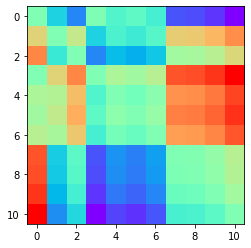

In [796]:
plt.imshow(X_gadf[0], cmap='rainbow')

In [633]:
xx=np.load("tiled2_pic/200.npy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


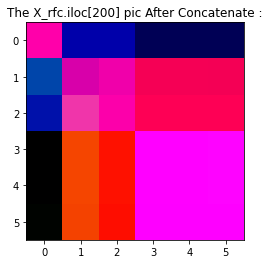

In [634]:
plt.title("The X_rfc.iloc[200] pic After Concatenate :")
plt.imshow(xx, cmap='rainbow')
plt.show()

[[[ 1.         -0.99976873 -0.99933188 -1.         -0.99994861
   -0.99994861]
  [-0.99976873  0.99907501  0.99831476  0.99976873  0.99949931
    0.99949931]
  [-0.99933188  0.99831476  0.9973284   0.99933188  0.99890998
    0.99890998]
  [-1.          0.99976873  0.99933188  1.          0.99994861
    0.99994861]
  [-0.99994861  0.99949931  0.99890998  0.99994861  0.99979443
    0.99979443]
  [-0.99994861  0.99949931  0.99890998  0.99994861  0.99979443
    0.99979443]]

 [[ 1.         -0.95418994 -1.         -0.93743017 -0.96834264
   -0.94469274]
  [-0.95418994  0.8209569   0.95418994  0.79031244  0.8492947
    0.80329115]
  [-1.          0.95418994  1.          0.93743017  0.96834264
    0.94469274]
  [-0.93743017  0.79031244  0.93743017  0.75755064  0.82084092
    0.77139767]
  [-0.96834264  0.8492947   0.96834264  0.82084092  0.87537495
    0.83292014]
  [-0.94469274  0.80329115  0.94469274  0.77139767  0.83292014
    0.78488874]]

 [[ 1.         -0.98351224 -1.         -0.9976814

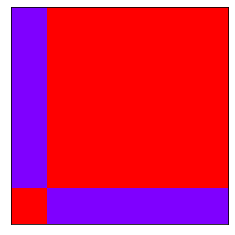

In [222]:
def convert_img(idx):
    fig = plt.figure()
    ax = plt.subplot(111)
    
    fname = f'imgs/{idx}.png'
    print(X_gasf)
    ax.imshow(X_gasf[idx], cmap='rainbow', origin='lower')
    ax.set_title('')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
#     fig.savefig(fname, bbox_inches='tight')

convert_img(0)

<ipython-input-870-99e1b0f7fdb3>:16: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)


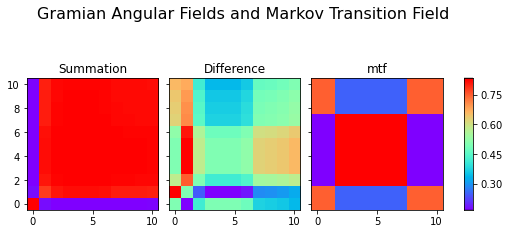

In [870]:
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 3),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[200], X_gadf[200], X_mtf[200]]
titles = ['Summation', 'Difference','mtf']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields and Markov Transition Field', y=0.98, fontsize=16)
plt.show()

In [389]:
X_gasf[0].astype(np.float32)

array([[ 1.        , -0.99976873, -0.9993319 , -1.        , -0.9999486 ,
        -0.9999486 ],
       [-0.99976873,  0.999075  ,  0.99831474,  0.99976873,  0.9994993 ,
         0.9994993 ],
       [-0.9993319 ,  0.99831474,  0.9973284 ,  0.9993319 ,  0.99890995,
         0.99890995],
       [-1.        ,  0.99976873,  0.9993319 ,  1.        ,  0.9999486 ,
         0.9999486 ],
       [-0.9999486 ,  0.9994993 ,  0.99890995,  0.9999486 ,  0.9997944 ,
         0.9997944 ],
       [-0.9999486 ,  0.9994993 ,  0.99890995,  0.9999486 ,  0.9997944 ,
         0.9997944 ]], dtype=float32)

In [798]:
from PIL import Image
import scipy.misc
import cv2

def concate(X_gasf,X_gadf,X_mtf):
    for i in range(227):
        a = np.concatenate((X_gasf[i].reshape((11,11,1)).astype(np.double),X_gadf[i].reshape((11,11,1)).astype(np.double),X_mtf[i].reshape((11,11,1)).astype(np.double)),axis=2)
        np.save(f"tile4_pic/{i}.npy",a)
        
        
concate(X_gasf,X_gadf,X_mtf)

In [799]:
xx=np.load("tile4_pic/226.npy")

In [801]:
xx.shape

(11, 11, 3)

In [345]:
type(X_gadf[1].reshape((6,6)))

NameError: name 'X_gadf' is not defined

In [209]:
X_rfc['12W'][0]

0.003

In [902]:
import random
label_json1=list(label_json.items())   #空列表不能有ls[0]这类，需要先变成json再转换
for i in range(227):
    label_json1[i] = list(label_json[i])
    label_json1[i][0]=os.path.join('tile4_pic',f'{i}.npy')
    label_json1[i][1]=y[i]
# print(label_json1)
# 打乱顺序
random.shuffle(label_json1)

In [903]:
type(label_json1[0][1])

numpy.int64

In [904]:
label_json1[0]

['tile4_pic/45.npy', 0]

In [905]:
train = label_json1[:180]
test = label_json1[180:]

In [906]:
import torch
import numpy as np
import skimage
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import models


In [907]:
torch.manual_seed(1)  # reproducible
 
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图片转换为Tensor,归一化至[0,1]
])
'''NPY数据格式'''
class MyDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data #加载npy数据
        self.transforms = transform #转为tensor形式
    def __getitem__(self, index):
        fn, label = self.data[index]
        img = np.load(fn)
        if self.transforms is not None:
            img = self.transforms(img)
        return img,label
        
    def __len__(self):
        return len(self.data) #返回数据的总个数
 
def main():
    train_dataset=MyDataset(train,transform)
    trainloader= DataLoader(train_dataset, batch_size=64, shuffle=True)
    i=iter(trainloader)
    img,label=i.next()
    print(img.shape,label)
#     print(type(img))

In [908]:
train_dataset=MyDataset(train,transform)
train_loader= DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset=MyDataset(test,transform)
test_loader= DataLoader(test_dataset, batch_size=64, shuffle=True)

In [909]:
main()

torch.Size([64, 3, 11, 11]) tensor([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])


In [912]:
def load_model():
    model = models.resnet101()
    model.fc = nn.Linear(in_features=model.fc.in_features,out_features=2)
#     model.load_state_dict(torch.load('resnet18.pth'))
#     print(model)    
    return model

In [913]:
# resnet = ResNet18()
resnet_2 = load_model()
resnet_2 = resnet_2.to(dtype=torch.float64)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet_2.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [810]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## resnet50 
Accuracy of the network on the  test images: 87.23404255319149%
f1 score of the network on the  test images: 0.8694444444444445
rmse:0.1276595744680851
new best score: 0.8694444444444445

In [865]:
X_rfc_reg.iloc[0]

pre    77.830000
2W      0.009000
4W      0.026000
6W      0.000000
8W      0.002000
10W     0.001000
12W     0.003000
14W     0.038315
16W     0.039712
18W     0.046622
20W     0.062144
Name: 0, dtype: float64

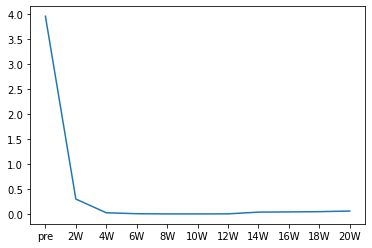

In [869]:
plt.plot(X_rfc_reg.iloc[150])

In [914]:
train_model(resnet_2,train_loader,test_loader,num_epoch=100,model_save_path='resnet50_2.pth')

Accuracy of the network on the  test images: 34.04255319148936%
f1 score of the network on the  test images: 0.25396825396825395
rmse:0.6595744680851063
new best score: 0.25396825396825395
model saved
Accuracy of the network on the  test images: 34.04255319148936%
f1 score of the network on the  test images: 0.25396825396825395
rmse:0.6595744680851063
Accuracy of the network on the  test images: 34.04255319148936%
f1 score of the network on the  test images: 0.25396825396825395
rmse:0.6595744680851063
Accuracy of the network on the  test images: 34.04255319148936%
f1 score of the network on the  test images: 0.25396825396825395
rmse:0.6595744680851063
Accuracy of the network on the  test images: 34.04255319148936%
f1 score of the network on the  test images: 0.25396825396825395
rmse:0.6595744680851063
Accuracy of the network on the  test images: 34.04255319148936%
f1 score of the network on the  test images: 0.25396825396825395
rmse:0.6595744680851063
Accuracy of the network on the  te

KeyboardInterrupt: 

In [900]:
def train_model(model, train_loader, test_loader, num_epoch=3, show_batch=200, 
        model_save_path='', plot=False):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
    
    # train neural network
    correct = 0
    total = 0
    f1 = 0
    best_f1 = 0
    loss_x = []
    loss_y = []
    acc_y = []

    for epoch in range(num_epoch):
        model.train()
        f1 = 0
        correct = 0
        total = 0
        running_loss = 0.0
        for i, data in enumerate(train_loader):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
#             print(outputs)
#             print(labels)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            f1 += f1_score(labels.cpu().numpy(), predicted.cpu().numpy(),average='macro')
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()
                
            if i % show_batch == (show_batch-1):    # print every 100 mini-batches
                accuracy = correct/total
                average_f1 = f1 / show_batch
                print(f"[{epoch+1}, {i+1}] loss: {running_loss / show_batch:.3f}, accuracy={accuracy:.3f}, f1-score={average_f1}")
                loss_x.append(i)
                loss_y.append(running_loss/show_batch)
                acc_y.append(accuracy)
                f1 = 0
                correct = 0
                total = 0
                running_loss = 0.0
                
                
                
        model.eval()
        f1 = 0
        correct = 0
        total = 0
        count = 0
        mse=0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                f1 += f1_score(labels.cpu().numpy(), predicted.cpu().numpy(),average='macro')
                count += 1
                mse+=mean_squared_error(labels,predicted)

        average_f1 = f1 / count
        print(f"Accuracy of the network on the  test images: {100 * correct / total}%")
        print(f"f1 score of the network on the  test images: {average_f1}")
        print(f"rmse:{mse}")
        if average_f1 > best_f1:
            best_f1 = average_f1
            torch.save(model.state_dict(), model_save_path)
            print(f"new best score: {average_f1}")
            print("model saved")
    

In [564]:
class ResBlk(nn.Module):
    def __init__(self,ch_in,ch_out):
        super(ResBlk,self).__init__()
        #super(ResBlk,self) 首先找到 ResBlk 的父类（就是类 nn.Module）
        #然后把类 ResBlk 的对象转换为类 nn.Module 的对象
        self.conv1=nn.Conv2d(ch_in,ch_out,kernel_size=3,stride=2,padding=1)
        self.bn1=nn.BatchNorm2d(ch_out)
        self.conv2=nn.Conv2d(ch_out,ch_out,kernel_size=3,stride=2,padding=1)
        self.bn2=nn.BatchNorm2d(ch_out)

        self.extra=nn.Sequential()
        if ch_out!=ch_in:
            self.extra=nn.Sequential(
                nn.Conv2d(ch_in,ch_out,kernel_size=3,stride=4,padding=1),
                nn.BatchNorm2d(ch_out)
            )
        
    def forward(self,x):
        out=F.relu(self.bn1(self.conv1(x)))
        out=self.bn2(self.conv2(out))
        #shortcut
        out=out+self.extra(x)
        return out


class ResNet18(nn.Module):
    def __init__(self):
        super(ResNet18,self).__init__()
        self.conv1=nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1)
        self.bn1=nn.BatchNorm2d(64)
        # followed by 4 blocks
        # [b,64,h,w]=>[b,128,h,w]
        self.blk1=ResBlk(64,128)
        # [b,128,h,w]=>[b,256,h,w]
        self.blk2=ResBlk(128,256)
        # [b,256,h,w]=>[b,512,h,w]
        self.blk3=ResBlk(256,512)
        # [b,512,h,w]=>[b,1024,h,w]
        self.blk4=ResBlk(512,1024)

        self.outlayer=nn.Linear(1024,2)

    def forward(self,x):
        x=F.relu(self.bn1(self.conv1(x)))
        # [b,64,h,w]=>[b,1024,h,w]
        x=self.blk1(x)
        x=self.blk2(x)
        x=self.blk3(x)
        x=self.blk4(x)
        # linear out
        # print(x.shape)
        x=x.view(x.size(0),-1)
        x=self.outlayer(x)
        return x

def main():
    # blk=ResBlk(64,512)
    # tmp=torch.randn(3,64,38,38)
    # out=blk(tmp)
    # print(out.shape)
    model=ResNet18()
    tmp=torch.randn(2,3,64,64)
    out=model(tmp)
    print(out.shape)




## 预测

In [446]:
X_rfc_10=X_rfc.iloc[:,0:6]


In [593]:
X_0

,pre,2W,4W,6W,8W,10W,12W
0,77.830,0.000,0.026,0.000,0.00,0.000,0.003
1,5.370,0.123,0.000,0.168,0.00,0.000,0.296
2,23.290,0.192,0.000,0.027,0.00,0.000,0.060
3,20.000,0.000,0.000,0.060,0.00,0.000,0.035
4,4.660,0.122,0.010,0.000,0.01,0.000,0.010
...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,0.00,0.000,0.000
223,21.000,0.640,0.060,0.110,0.00,0.000,0.000
224,15.300,0.000,0.050,0.001,0.00,0.000,0.003
225,23.000,0.750,0.110,0.030,0.00,0.000,0.000


In [131]:
target='label'
X = df_imputed.drop(target, axis=1)
y = df_imputed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [877]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import linear_model
# model=SVC()
# model=LogisticRegression()
# model=DecisionTreeClassifier()
model=linear_model.Ridge(alpha=.5)
# model=RandomForestClassifier()
scores = cross_val_score(model, X_rfc_reg, y, cv=5)
# X_train, X_test, y_train, y_test = train_test_split(X_rfc_reg, y, test_size=0.5, random_state=42)
# model.fit(X_train,y_train)
# pred=model.predict(X_test)
# print(f"{precision_score(pred,y_test)},{recall_score(pred,y_test)},{f1_score(pred,y_test)}")

In [879]:
X_rfc_reg

,pre,2W,4W,6W,8W,10W,12W,14W,16W,18W,20W
0,77.830,0.009,0.026,0.000,0.002,0.001,0.003,0.038315,0.039712,0.046622,0.062144
1,5.370,0.123,0.000,0.168,0.085,0.001,0.296,0.055172,0.059137,0.050835,0.071357
2,23.290,0.192,0.000,0.027,0.002,0.001,0.060,0.038790,0.051047,0.058088,0.067429
3,20.000,0.009,0.000,0.060,0.002,0.001,0.035,0.038151,0.047238,0.056121,0.065697
4,4.660,0.122,0.010,0.000,0.010,0.000,0.010,0.038607,0.039831,0.074056,0.057352
...,...,...,...,...,...,...,...,...,...,...,...
222,8.160,0.384,0.030,0.006,0.001,0.001,0.000,0.036707,0.038229,0.045781,0.075540
223,21.000,0.640,0.060,0.110,0.013,0.001,0.012,0.039422,0.041014,0.050455,0.056619
224,15.300,0.008,0.050,0.001,0.001,0.001,0.003,0.037029,0.039687,0.046347,0.058319
225,23.000,0.750,0.110,0.030,0.001,0.008,0.011,0.103100,0.049894,0.051394,0.067085


In [148]:
X.iloc[[0]]

,pre,2W,4W,6W,8W,10W,12W
0,77.83,3.26,0.026,2.744,1.095,0.757,0.003


In [162]:
X.iloc[0].diff(1)

pre       NaN
2W    -74.570
4W     -3.234
6W      2.718
8W     -1.649
10W    -0.338
12W    -0.754
Name: 0, dtype: float64

## ARIMA

[Text(0, 0.5, 'Percentage of alpha'), Text(0.5, 0, 'week')]

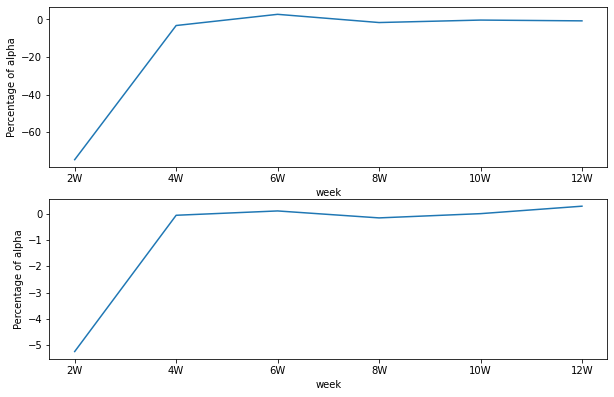

In [176]:
# plt.plot(X.iloc[0])
fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(311)
diff1 = X.iloc[0].diff(1)
ax1.plot(diff1)
ax1.set(xlabel='week', ylabel='Percentage of alpha')
ax2= fig.add_subplot(312)
diff2 = X.iloc[1].diff(1)
ax2.plot(diff2)
ax2.set(xlabel='week', ylabel='Percentage of alpha')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


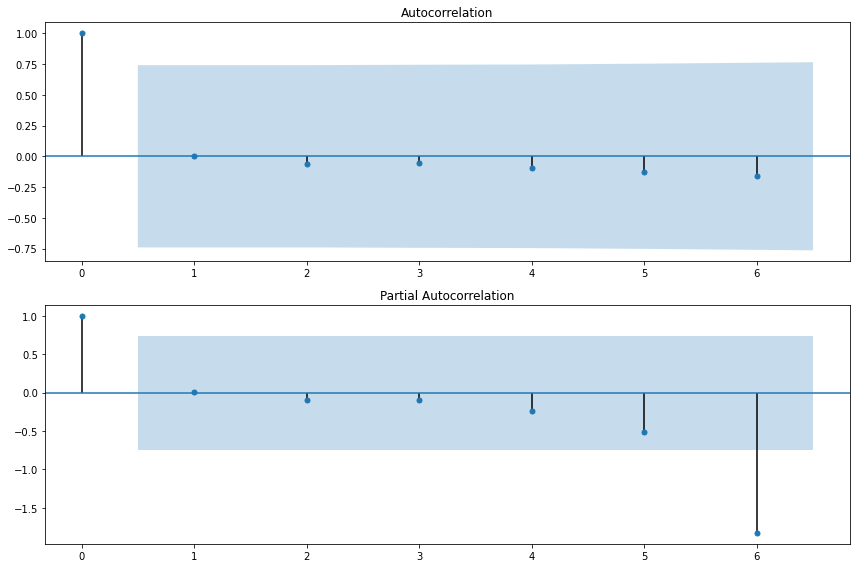

In [211]:
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X.iloc[0], lags=6,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X.iloc[0], lags=6, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


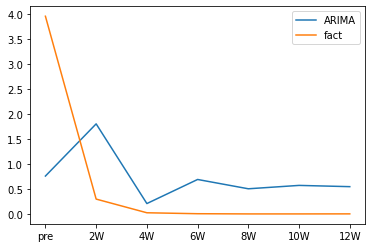

In [146]:
mod = ARIMA(X_rfc.iloc[150], order=(0,0,1))
mod.fit()
predictions = mod.fit().predict()
plt.plot(predictions,label='ARIMA')
plt.plot(X_rfc.iloc[150],label='fact')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<Figure size 864x576 with 0 Axes>

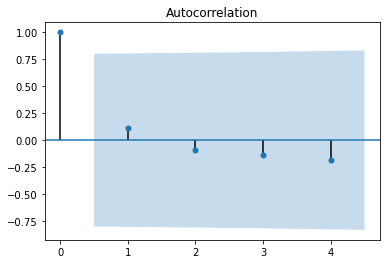

In [577]:
model = sm.tsa.ARIMA(X_rfc.iloc[0], order=(1, 1, 0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=4)
plt.show()



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


2W     -9.686620
4W    -77.821000
6W     -0.025945
8W     -0.025976
10W     0.001985
12W    -0.000998
dtype: float64


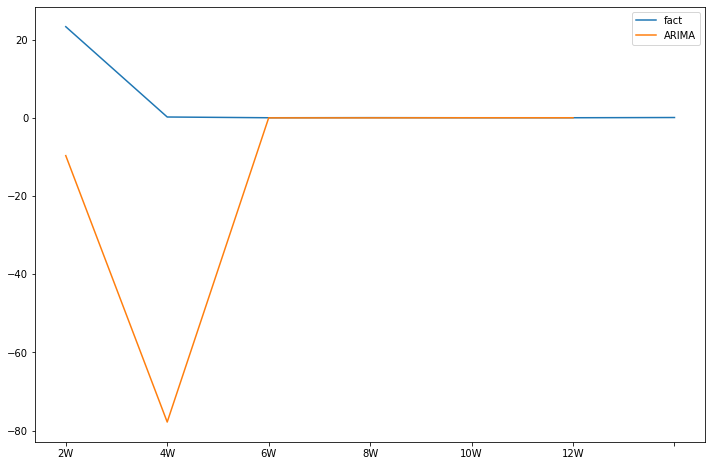

In [121]:
model = sm.tsa.ARIMA(X_rfc.iloc[0], order=(2, 1, 0))
results = model.fit()
predict_sunspots = results.predict(start=str('2W'),end=str('12W'),dynamic=False)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = X_rfc.loc[2].plot(ax=ax,label='fact')
predict_sunspots.plot(ax=ax,label='ARIMA')
plt.legend()
plt.show()



In [562]:
results.forecast()[0:4]

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1866: RuntimeWarning: invalid value encountered in sqrt
  fcerr = np.sqrt(np.cumsum(cumsum_n(ma_rep, self.k_diff) ** 2) * sigma2)


(array([0.00464882]), array([nan]), array([[nan, nan]]))

In [580]:
X_rfc.loc[2]

pre    23.290
2W      0.192
4W      0.000
6W      0.027
8W      0.002
10W     0.001
12W     0.060
Name: 2, dtype: float64